In [1]:
import os

In [2]:
from lsst.sims.photUtils import BandpassDict

In [3]:
import pandas as pd

In [4]:
import obscond

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
TotbpDict, hwbpDict = BandpassDict.loadBandpassesFromFiles()

###  Check with a quick plot that Total and HardWare make sense

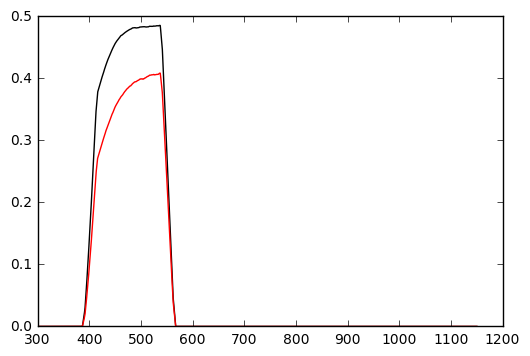

In [7]:
fig, ax = plt.subplots()
ax.plot(hwbpDict['g'].wavelen, hwbpDict['g'].sb, 'k')
ax.plot(hwbpDict['g'].wavelen, TotbpDict['g'].sb, 'r')

In [8]:
pointings = pd.read_csv(os.path.join(obscond.example_data_dir, 'example_pointings.csv'), index_col='obsHistID')

In [9]:
skycalc = obscond.SkyCalculations(photparams="LSST", hwBandpassDict=hwbpDict)

In [10]:
pointings[['fieldRA', 'fieldDec', 'expMJD', 'airmass', 'FWHMeff', 'filter']].head()

,fieldRA,fieldDec,expMJD,airmass,FWHMeff,filter
obsHistID,,,,,,
230,0.925184,-0.478900,59580.139555,1.090199,1.121968,r
1679570,0.000000,-0.794553,62086.152635,1.169360,0.837221,z
1679569,0.000000,-0.794553,62086.152218,1.168118,0.836687,z
1679568,0.000000,-0.794553,62086.151802,1.166882,0.836156,z
1679567,0.000000,-0.794553,62086.151385,1.165654,0.835628,z


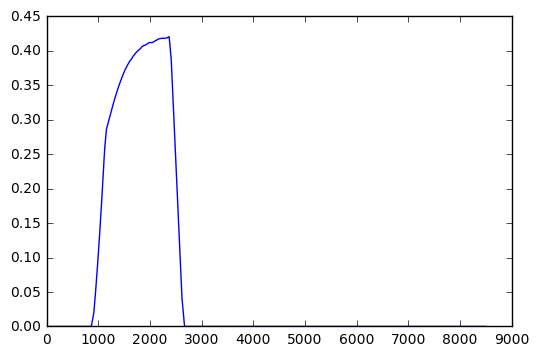

In [11]:
plt.plot(skycalc.adb.bandpassForAirmass('g', 1.00).sb)

## Demos

Try out an example where the airmass used for calculating the bandpass is calculated

In [12]:
skycalc.fiveSigmaDepth('g', 1.086662, 0.925184, -0.4789, 61044.077855,  use_provided_airmass=False)

/Users/rbiswas/soft/LSST/DarwinX86/healpy/1.8.1.lsst2+5/lib/python/healpy-1.8.1-py2.7-macosx-10.6-x86_64.egg/healpy/pixelfunc.py:1045: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if phi == None:


23.060143825936187

Try it out when a value has not been provided but `use_provided_airmass` is True

In [13]:
skycalc.fiveSigmaDepth('g', 1.086662, 0.925184, -0.4789, 61044.077855,  use_provided_airmass=True)

23.060143825936187

In [14]:
skycalc.fiveSigmaDepth('g', 1.086662, 0.925184, -0.4789, 61044.077855,  provided_airmass=1.008652, 
                       use_provided_airmass=True)

23.060143825936187

### Calculating the skymag

In [15]:
skycalc.skymag('r', 0.925, -0.4789, 59580.14)

21.260523310530708

### Calculating values for an OpSim dataframe

In [16]:
skycalc.calculatePointings(pointings)

,airmass,altitude,azimuth,filtSkyBrightness,fiveSigmaDepth
obsHistID,,,,,
230,1.091707,1.157985,4.717173,21.261397,24.083774
1679570,1.164445,1.032881,4.030366,19.285337,23.125717
1679569,1.163225,1.034641,4.029286,19.286363,23.126892
1679568,1.162015,1.036396,4.028195,19.287382,23.128060
1679567,1.160809,1.038154,4.027089,19.288396,23.129222
1679566,1.159611,1.039910,4.025969,19.289404,23.130378
1679565,1.158422,1.041660,4.024839,19.290404,23.131528
1679564,1.157238,1.043412,4.023694,19.291401,23.132671
1679563,1.156061,1.045164,4.022534,19.292391,23.135973


In [17]:
x = skycalc.calculatePointings(pointings).join(pointings, rsuffix='opsim')

In [19]:
x['airmass_diff'] = x.airmass - x.airmassopsim

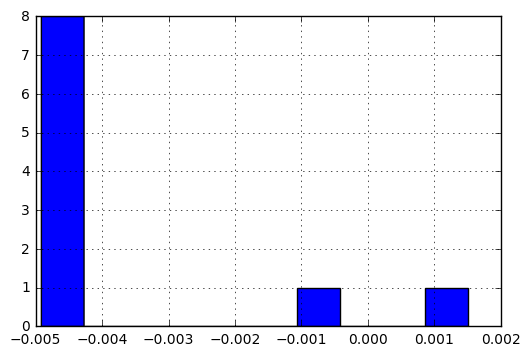

In [20]:
x.airmass_diff.hist()